In [1]:
# from jax.config import config
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# import moscot as mt
import squidpy as sq
import numpy as np
from pathlib import Path
import pickle
import scipy
import scanpy as sc
import matplotlib.pyplot as plt

# config.update("jax_enable_x64", True)
# # sc.set_figure_params()
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
# PICKLE_KWARGS = {"allow_pickle": True}
# path = Path("/lustre/groups/ml01/workspace/moscot_paper/mosta")
# adata = sc.read(path / "mosta_full.h5ad")

# adata.obsp["tmap"] = np.load(path / "transition_matrix.pkl", allow_pickle=True).tocsr()
# adata.obsp["tmap"].eliminate_zeros()

# adata = adata[:, adata.var.highly_variable].copy()
# adata.write(path / "mosta_filter.h5ad")
# # tmap = scipy.sparse.load_npz(path/"transition_matrix.pkl", allow_pickle=True)

In [4]:
adatas = []
for c in adata.obs.timepoint.cat.categories:
    adata_temp = adata[adata.obs.timepoint == c].copy()
    sc.pp.pca(adata_temp)
    sc.pp.neighbors(adata_temp)
    sc.tl.umap(adata_temp)
    adatas.append(adata_temp)
    print(c, " done...")

E9.5  done...
E10.5  done...
E11.5  done...
E12.5  done...
E13.5  done...
E14.5  done...
E15.5  done...
E16.5  done...


In [5]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [7]:
for i, c in enumerate(adata.obs.timepoint.cat.categories):
    print(i, c)
    adatas[i].write(path / f"mosta_{c}.h5ad")

0 E9.5
1 E10.5
2 E11.5
3 E12.5
4 E13.5
5 E14.5
6 E15.5
7 E16.5


In [9]:
adata.write(path / "mosta_filter_umap.h5ad")

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


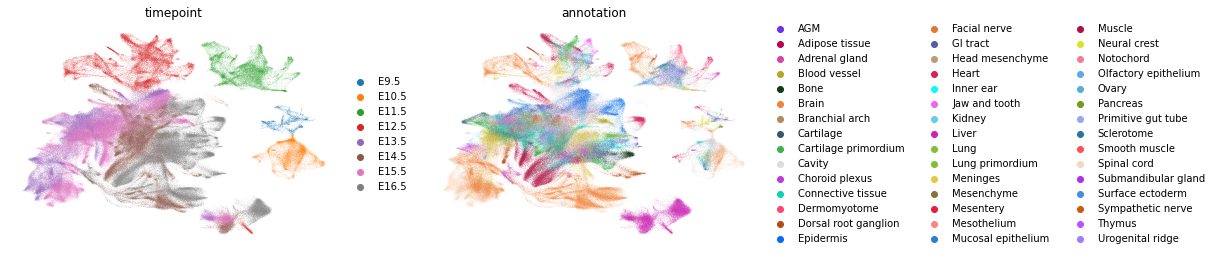

<Figure size 432x288 with 0 Axes>

In [19]:
sc.pl.umap(
    adata,
    color=[
        "timepoint",
        "annotation",
    ],
    frameon=False,
    hspace=10,
)
plt.tight_layout()

In [4]:
import pandas as pd

df = pd.read_csv(
    "/lustre/groups/ml01/workspace/moscot_paper/mosta/Mus_musculus_TF", sep="\t"
)

,Species,Symbol,Ensembl,Family,Protein,Entrez_ID
0,Mus_musculus,Lin28b,ENSMUSG00000063804,CSD,ENSMUSP00000078361.7;,380669.0
1,Mus_musculus,Tbx2,ENSMUSG00000000093,T-box,ENSMUSP00000000095.7;,21385.0
2,Mus_musculus,Dmtf1,ENSMUSG00000042508,MYB,ENSMUSP00000071815.6;ENSMUSP00000139361.2;ENSM...,23857.0
3,Mus_musculus,Irx4,ENSMUSG00000021604,Homeobox,ENSMUSP00000134738.2;ENSMUSP00000022095.8;,50916.0
4,Mus_musculus,Irf3,ENSMUSG00000003184,IRF,ENSMUSP00000146773.2;ENSMUSP00000146383.2;ENSM...,54131.0
...,...,...,...,...,...,...
1606,Mus_musculus,Zfp706,ENSMUSG00000062397,Others,NaN,68036.0
1607,Mus_musculus,D630045J12Rik,ENSMUSG00000063455,Others,NaN,330286.0
1608,Mus_musculus,Lyar,ENSMUSG00000067367,Others,NaN,17089.0
1609,Mus_musculus,Prdm11,ENSMUSG00000075028,Others,NaN,100042784.0
